# Titanic ML Dataset Exploration and Cleaning
This notebook will be used for analysing and understanding the patterns in the dataset, and for doing and initial cleaning that I may or may not need to do. Afterwards, I will develope a range of classification models and test their successes on the data.

In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


### Importing datasets.

In [86]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
combine = [train, test]

### Run through example exploration from the accompanying tutorial.

In [89]:
women = train.loc[train.Sex == "female"]["Survived"]
women_rate = sum(women)/len(women)

print("% of women who survived: " + str(women_rate))

% of women who survived: 0.7420382165605095


In [90]:
men = train.loc[train.Sex == "male"]["Survived"]
men_rate = sum(men)/len(men)

print("% of men who survived: " + str(men_rate))

% of men who survived: 0.18890814558058924


### Creating the basic random forest model used in the tutorial.

In [91]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({"passengerId": test.PassengerId, "Survived": predictions})
output.head()

,passengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Initiate main analysis following [Pedro Marcelino's](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) notebook
This will be the meat and potatoes of this exploratory analysis and I hope to gain my primary understanding here. I have created a table with my understanding of the columns in our data:

| Variable    | Type        | Segment  | Expectation | Conclusion        | Comments       |
|-------------|-------------|----------|-------------|-------------------|----------------|
| PassengerId | Numerical   | ShipStat | Low         | Not correlated    |                |
| Survived    | Categorical | ShipStat | Null        | N/A               |                |
| Pclass      | Categorical | ShipStat | Medium      | Fairly correlated |                |
| Name        | Categorical | Personal | Low         | Not correlated    |                |
| Sex         | Categorical | Personal | High        | Correlated        |                |
| Age         | Numerical   | Personal | Medium      | Fairly correlated | Contains nulls |
| SibSp       | Numerical   | Personal | Low         | Not correlated    |                |
| Parch       | Numerical   | Personal | Medium      | Not correlated    |                |
| Ticket      | Categorical | ShipStat | Low         | N/A               |                |
| Fare        | Numerical   | ShipStat | Low         | Not correlated    |                |
| Cabin       | Categorical | ShipStat | Medium      | N/A               | Contains nulls |
| Embarked    | Categorical | ShipStat | Low         | N/A               | Contains nulls ||

<br>
I will subsequently fill out the conclusion and comments sections after I analyze the data with histagrams and plots.

In [92]:
# Descriptive statistics summary
train["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [93]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## Let's check out the survival rate paired with the other variables

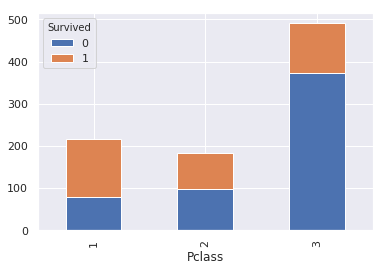

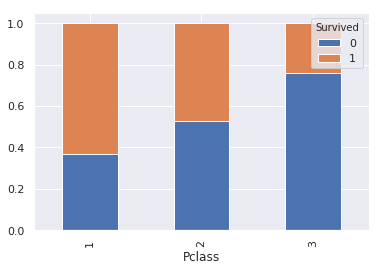

In [94]:
# Numbers of survivers / deaths for each ticket class type.
data = train.groupby(["Pclass", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
# data.head()
data.plot.bar(stacked=True)

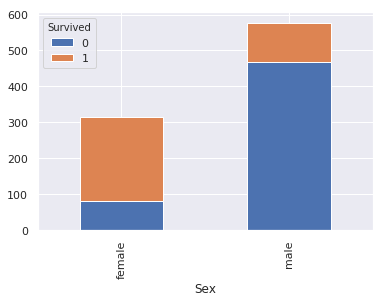

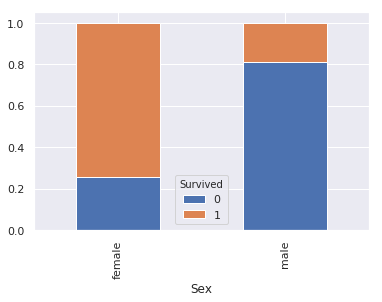

In [95]:
# Numbers of survivers / deaths for gender.
data = train.groupby(["Sex", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
data.plot.bar(stacked=True)

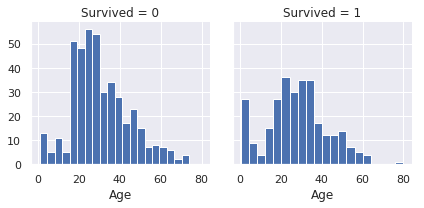

In [96]:
# Numbers of survivers / deaths for passenger age.
# data = train.groupby(["Age", "Survived"]).size().unstack()

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# data.plot.bar(stacked=True)

# Normalize the data
# data = data.div(data.sum(axis=1), axis=0)
# data.plot.bar(stacked=True)

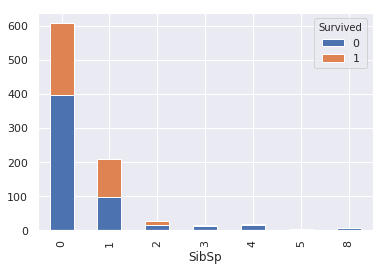

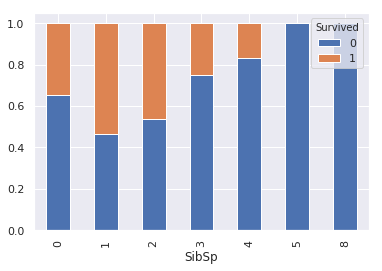

In [97]:
# Numbers of survivers / deaths for the number of passenger siblings and spouses.
data = train.groupby(["SibSp", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
data.plot.bar(stacked=True)

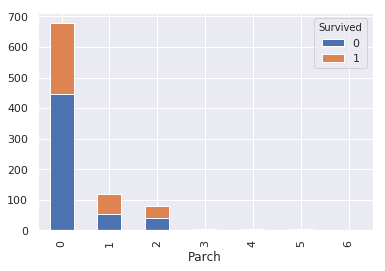

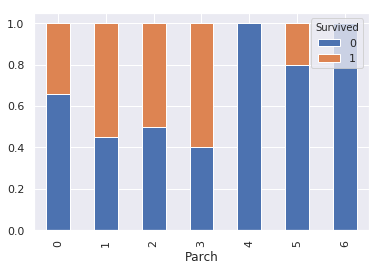

In [98]:
# Numbers of survivers / deaths for number of children and parents.
data = train.groupby(["Parch", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
data.plot.bar(stacked=True)

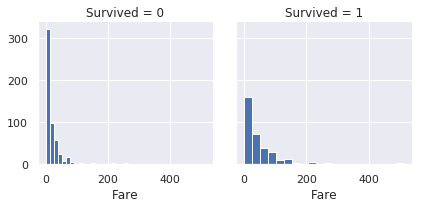

In [99]:
# Numbers of survivers / deaths for fare.
# data = train.groupby(["Fare", "Survived"]).size().unstack()

g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

# data.plot.bar(stacked=True)

# Normalize the data
# data = data.div(data.sum(axis=1), axis=0)
# data.plot.bar(stacked=True)

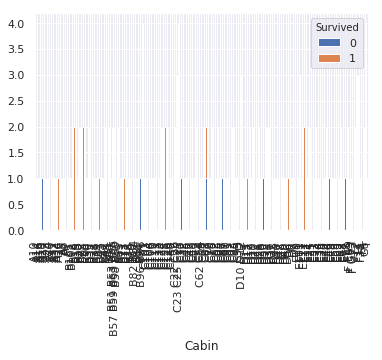

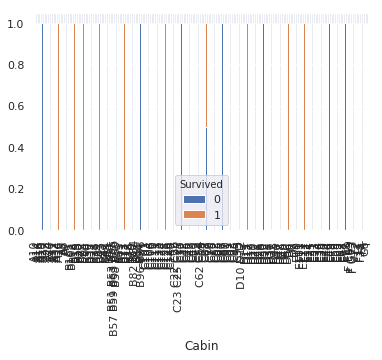

In [100]:
# Numbers of survivers / deaths for cabin number.
data = train.groupby(["Cabin", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
data.plot.bar(stacked=True)

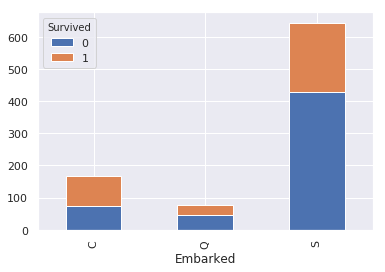

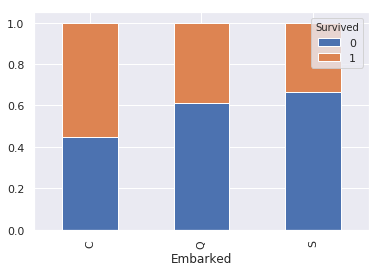

In [101]:
# Numbers of survivers / deaths for embark location.
data = train.groupby(["Embarked", "Survived"]).size().unstack()

data.plot.bar(stacked=True)

# Normalize the data
data = data.div(data.sum(axis=1), axis=0)
data.plot.bar(stacked=True)

## I will now attempt more in depth analysis using new techniques

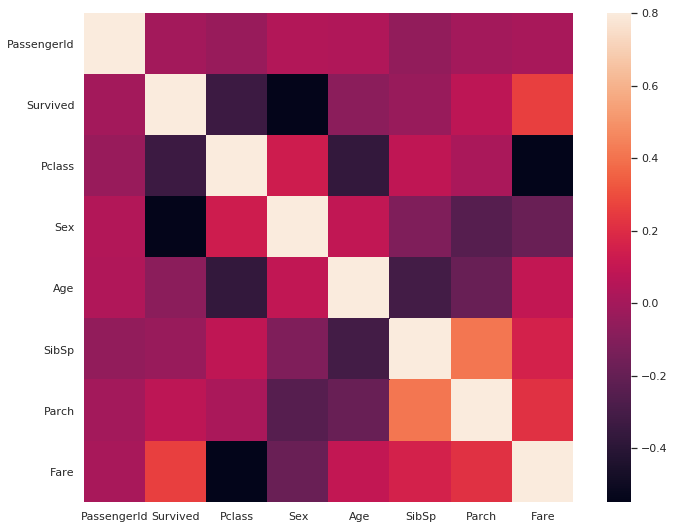

In [102]:
#correlation matrix
gender = {"female": 0, "male": 1}
train.Sex = [gender[v] for v in train.Sex]

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# Reset
gender2 = ["female", "male"]
train.Sex = [gender2[v] for v in train.Sex]

From this map we can see some of the correlations that were noticeable from the bar charts. For one thing, there seems to be a strong correlation between gender and survival rate. The class of the passenger comes in second. Many of the other correlations are expected (like age and class, and age and family members).

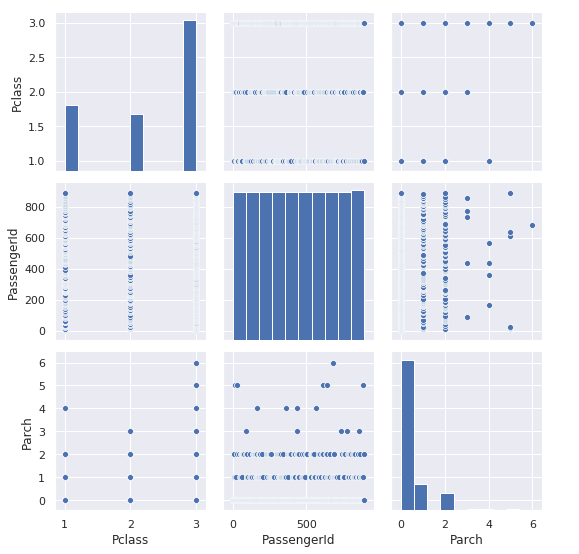

In [103]:
#scatterplot
sns.set()
cols = ['Pclass', 'Sex', 'PassengerId', 'Parch']
sns.pairplot(train[cols], height = 2.5)
plt.show();

All this analysis has proven useful on the admitedly simple dataset. Both Sex and Pclass seem to relate the most strongly with survival chance here. It is now time to wrangle the data into useful shape.

# Wrangling

### Dropping features
I will now remove the features that were found to be the least useful for our predictions. From here on out I will be heavily utilizing information from [Titanic Data Science Solutions](http://https://www.kaggle.com/startupsci/titanic-data-science-solutions).

In [104]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(["Ticket", "Cabin"], axis=1)
test = test.drop(["Ticket", "Cabin"], axis=1)
combine = [train, test]

print("After", train.shape, test.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


Creating new features from the name data.

In [105]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
    
pd.crosstab(train["Title"], train["Sex"])
# pd.crosstab(train["Title"], train["Age"])
# pd.crosstab(train["Title"], train["Survived"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [106]:
# Cleanup
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", \
                                                 "Dr", "Major", "Rev", "Sir", "Jonkheer", \
                                                "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms"], "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
train[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [107]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [108]:
train = train.drop(["Name", "PassengerId"], axis=1)
test = test.drop(["Name"], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

As per the suggestion, I will now convert to string columns categorical features.

In [109]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female": 1, "male": 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


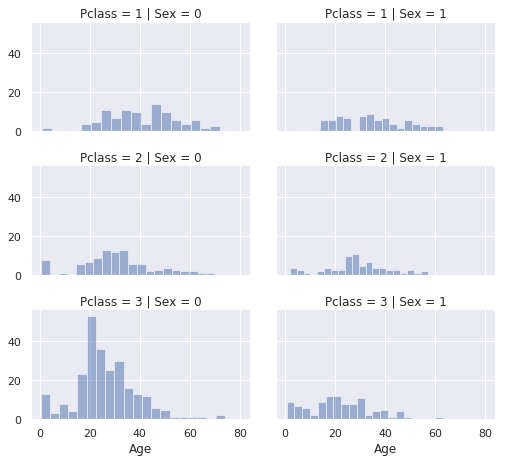

In [110]:
grid = sns.FacetGrid(train, row="Pclass", col="Sex", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

In [111]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [112]:
# Age estimations
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset["Sex"] == i) & (dataset["Pclass"] == j+1)]["Age"].dropna()
            age_guess = guess.median()
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                       "Age"] = guess_ages[i, j]
    dataset["Age"] = dataset["Age"].astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [113]:
train["AgeBand"] = pd.cut(train["Age"], 5)
train[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [114]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[dataset["Age"] > 16 & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[dataset["Age"] > 32 & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[dataset["Age"] > 48 & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,3,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,3,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,3,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,3,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,3,0,0,8.0500,S,1,"(32.0, 48.0]"


In [115]:
train = train.drop(["AgeBand"], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,3,1,0,7.2500,S,1
1,1,1,1,3,1,0,71.2833,C,3
2,1,3,1,3,0,0,7.9250,S,2
3,1,1,1,3,1,0,53.1000,S,3
4,0,3,0,3,0,0,8.0500,S,1


Now we will combine Parch and SibSp into a single feature.

In [116]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    
train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="FamilySize", ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [117]:
# Create IsAlone feature 
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1
    
train[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [118]:
# Dropping old features now
train = train.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test = test.drop(["Parch", "SibSp", "FamilySize"], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,3,7.2500,S,1,0
1,1,1,1,3,71.2833,C,3,0
2,1,3,1,3,7.9250,S,2,1
3,1,1,1,3,53.1000,S,3,0
4,0,3,0,3,8.0500,S,1,1


In [119]:
# Combine Pclass and Age
for dataset in combine:
    dataset["Age*Class"] = dataset.Age * dataset.Pclass
    
train.loc[:, ["Age*Class", "Age", "Pclass"]].head(10)

,Age*Class,Age,Pclass
0,9,3,3
1,3,3,1
2,9,3,3
3,3,3,1
4,9,3,3
5,9,3,3
6,3,3,1
7,0,0,3
8,9,3,3
9,0,0,2


In [120]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [121]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
    
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()\
.sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [122]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,3,7.2500,0,1,0,9
1,1,1,1,3,71.2833,1,3,0,3
2,1,3,1,3,7.9250,0,2,1,9
3,1,1,1,3,53.1000,0,3,0,3
4,0,3,0,3,8.0500,0,1,1,9


In [123]:
# Fixing fare
test["Fare"].fillna(test["Fare"].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,3,7.8292,2,1,1,9
1,893,3,1,3,7.0000,0,3,0,9
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,3,8.6625,0,1,1,9
4,896,3,1,3,12.2875,0,3,0,9


In [124]:
train["FareBand"] = pd.qcut(train["Fare"], 4)
train[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [125]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)
    
train = train.drop(["FareBand"], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,3,0,0,1,0,9
1,1,1,1,3,3,1,3,0,3
2,1,3,1,3,1,0,2,1,9
3,1,1,1,3,3,0,3,0,3
4,0,3,0,3,1,0,1,1,9


In [126]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,3,0,2,1,1,9
1,893,3,1,3,0,0,3,0,9
2,894,2,0,3,1,2,1,1,6
3,895,3,0,3,1,0,1,1,9
4,896,3,1,3,1,0,3,0,9


# Random Forest, Logistic Regression, Ensembles, etc.
It is now time to try to crack this dataset with the most sophisticated tools ever concieved by the human race! But in all seriousness, I will create and test individual models using Keras and TensorFlow and see how well each performs. 

In [127]:
# Training / testing data
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Logistic Regression

Let's test out a basic logistic regression for our dataset

In [128]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.81

In [131]:
# Correlations for each variable
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ["Feature"]
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,2.264381
5,Title,0.331855
4,Embarked,0.316872
7,Age*Class,0.189917
6,IsAlone,0.153681
3,Fare,-0.072633
2,Age,-0.799080
0,Pclass,-1.596613


## Decision Trees

Let's see how decision trees perform 

In [134]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.96

## Random Forest
Let's take the success of the last model and see if a random forest will do even better.

In [135]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.96

## Model Evalutation

In [136]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,84.96
2,Decision Tree,84.96
0,Logistic Regression,80.81


In [139]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv('submission.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../output/submission.csv'